## **STEP1**

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import io

### **STEP2**

In [ ]:
pd.__version__

In [ ]:
matplotlib.__version__

## **STEP3**

In [ ]:
#As I'm using Google colab
from google.colab import files
#Uploading the file in Goggle Colab
uploaded = files.upload()

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv'])) 
print(df.head())

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df['Amount'].describe()

## **STEP4**

In [ ]:
df.isnull().any()

In [ ]:
#Number of null values in a column
df.isnull().sum()

## **STEP5**

In [ ]:
#In 'Class' column '0' is normal and '1' is fraud
df['Class'].unique()

In [ ]:
ddd = {"'0'" : 'Normal', "'1'" : 'Fraud'}
for i in df['Class'].unique():
  per = (df['Class'] == i).sum()/len(df)*100
  print("%s = %.2f%%"%(ddd[i], per))
  

## **STEP6**

PLOT FOR OVERALL DATASET

Text(0, 0.5, 'Amount')

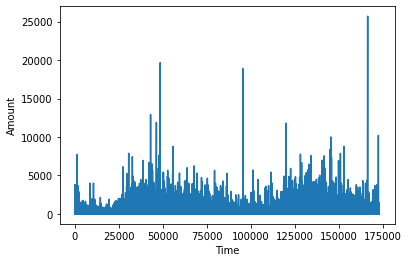

In [68]:
#Amount Transacted v/s time
plt.plot(df['Time'], df['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')

In [33]:
#Amount transacted in frauds
f = df[df['Class'] == "'1'"]
f = f.reset_index()
total_in_fraud = f['Amount'].sum()

PLOT FOR FRAUDS

Text(0, 0.5, 'Amount')

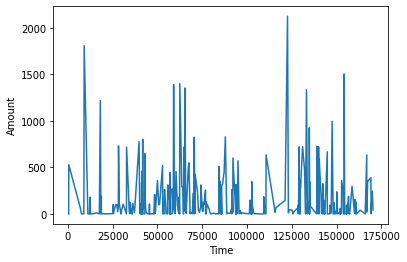

In [66]:
#Amount Transacted v/s time
plt.plot(f['Time'], f['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')

In [34]:
#Normal Transaction 
n = df[df['Class'] == "'0'"]
n = n.reset_index()
total_in_normal = n['Amount'].sum() 

PLOT FOR NORMAL


Text(0, 0.5, 'Amount')

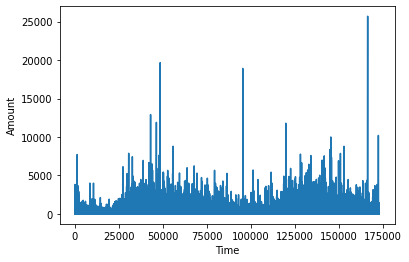

In [67]:
#Amount Transacted v/s time
#
plt.plot(n['Time'], n['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')

In [ ]:
#fraud trasaction relative to normal
per = (total_in_fraud/total_in_normal)*100
round(per, 2)

In [ ]:
#fraud tractions relative to total
per1 = (total_in_fraud/df['Amount'].sum())*100
round(per1, 2)

In [46]:
#At what time max number for transctions are done?
df1=df.groupby('Time')['Time'].value_counts()

In [57]:
time_in_sec = df1[df1 == df1.max()].index[0][0]

In [61]:
time_in_hrs = round(((time_in_sec/60)/60), 2)
print('At {} hr time, max number of transaction are done - {}'.format(time_in_hrs, df1.max()))

At 45.32 hr time, max number of transaction are done - 36


DAY1 v/s DAY2 Analysis

In [75]:
day_1 = df[df['Time']<= 86400].reset_index()
day_2 = df[df['Time']>86400].reset_index()

In [ ]:
#Day1 has more transaction then Day2
len(day_1) > len(day_2)

Text(0.5, 1.0, 'DAY1')

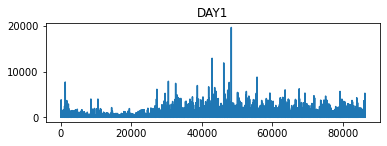

In [85]:
plt.plot(day_1['Time'], day_1['Amount'])
plt.title('DAY1')

Text(0.5, 1.0, 'DAY2')

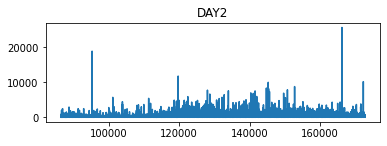

In [84]:
plt.plot(day_2['Time'], day_2['Amount'])
plt.title('DAY2')

## **STEP7**

(0.0, 25692.0)

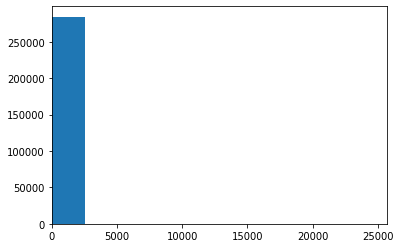

In [103]:
plt.hist(df['Amount'])
import math
min = math.floor(df['Amount'].min())
max = math.ceil(df['Amount'].max())
plt.xlim(min, max)